In [ ]:
# Import statements for all of the packages that I plan to use.
import requests
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
# upload the databse from the .csv file we download it.
movies_db_df = pd.read_csv('data_base_movies.csv')

In [114]:
# First step is to clean the data and see which are the redundant or unnecessary cols

del_col_list = ['Unnamed: 0']
#movies_db_df[['column_a']]

movies_db_df = movies_db_df.drop(del_col_list, axis=1)
movies_db_df.head()

,ID,Title,Popularity,Release_Date,Vote_Average,Vote_Count
0,19404,Dilwale Dulhania Le Jayenge,16.808,1995-10-20,9.0,2015
1,278,The Shawshank Redemption,32.926,1994-09-23,8.7,12582
2,238,The Godfather,29.979,1972-03-14,8.6,9630
3,372058,Your Name.,19.244,2016-08-26,8.6,3833
4,424,Schindler's List,22.057,1993-12-15,8.5,7631


In [115]:
movies_db_df.head() 
#call out the first 5 querries 

,ID,Title,Popularity,Release_Date,Vote_Average,Vote_Count
0,19404,Dilwale Dulhania Le Jayenge,16.808,1995-10-20,9.0,2015
1,278,The Shawshank Redemption,32.926,1994-09-23,8.7,12582
2,238,The Godfather,29.979,1972-03-14,8.6,9630
3,372058,Your Name.,19.244,2016-08-26,8.6,3833
4,424,Schindler's List,22.057,1993-12-15,8.5,7631


In [96]:
# second step is checking if there are null values

print(movies_db_df.isnull().sum().any())

# and checking if there are duplicate values

print(movies_db_df.duplicated().sum())

False
220


In [14]:
movies_db_df.info()
# check the tyoe for each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7254 entries, 0 to 7253
Data columns (total 7 columns):
Unnamed: 0      7254 non-null int64
ID              7254 non-null int64
Title           7254 non-null object
Popularity      7254 non-null float64
Release_Date    7254 non-null object
Vote_Average    7254 non-null float64
Vote_Count      7254 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 396.8+ KB


In [116]:
movies_db_df.describe()
# run pd.describe() to view some basic statistical details

,ID,Popularity,Vote_Average,Vote_Count
count,7254.000000,7254.000000,7254.000000,7254.000000
mean,100101.098980,10.297494,6.547877,1228.887648
std,142512.350352,10.901487,0.905881,2068.686651
min,5.000000,0.600000,2.600000,150.000000
25%,9007.250000,6.881000,5.900000,243.000000
50%,14696.000000,8.443500,6.600000,465.000000
75%,159064.500000,11.044000,7.200000,1160.750000
max,569547.000000,419.096000,9.000000,21409.000000


In [118]:
# We changed the release_date column into Date format to extract the year
# from the date which will help us in analysing yearly data.
# to make the change we imported datetime 
movies_db_df.Release_Date = pd.to_datetime(movies_db_df['Release_Date'])
#movies_df.Release_Date

In [119]:
# We then defined the 
movies_db_df['Year_Release'] = movies_db_df['Release_Date'].dt.year
movies_db_df.head()

,ID,Title,Popularity,Release_Date,Vote_Average,Vote_Count,Year_Release
0,19404,Dilwale Dulhania Le Jayenge,16.808,1995-10-20,9.0,2015,1995
1,278,The Shawshank Redemption,32.926,1994-09-23,8.7,12582,1994
2,238,The Godfather,29.979,1972-03-14,8.6,9630,1972
3,372058,Your Name.,19.244,2016-08-26,8.6,3833,2016
4,424,Schindler's List,22.057,1993-12-15,8.5,7631,1993


In [ ]:
# We delete the unwanted date format column
del_col_list = ['Release_Date']
movies_db_df = movies_db_df.drop(del_col_list, axis=1)

In [125]:
# Answer to First question:
# We wanted to find what years had the most popular movies released.
Popular_movies_db_df = movies_db_df.sort_values(by ='Popularity', ascending=False).head()
Popular_movies_db_df[['Title','Year_Release']]

# below are the 5 most popular movies with the year released. 

,Title,Year_Release
1666,Captain Marvel,2019
718,How to Train Your Dragon: The Hidden World,2019
1255,Us,2019
3886,Bumblebee,2018
3825,The Mule,2018


In [124]:
#  dropping the duplicates from the dataset.
print(movies_db_df.shape)
movies_db_df = movies_db_df.drop_duplicates(subset ='Title' , keep='first', inplace=False)

(7254, 6)


In [131]:
People_Vote_df = movies_db_df[movies_db_df["Vote_Count"] > 3000]
#to select certain rows in your data set based on the value
#for a certain variable. 

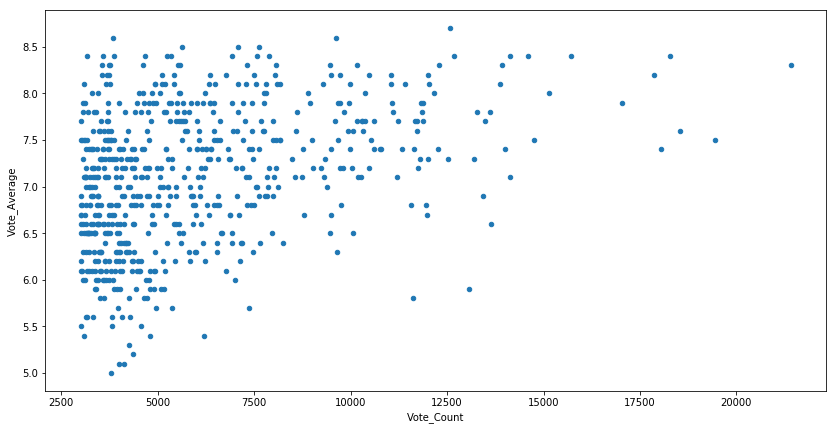

In [132]:
People_Vote_df.plot(x='Vote_Count',y='Vote_Average',kind='scatter',figsize=(14,7));

Text(0.5, 1.0, 'The Vote Average and Vote count')

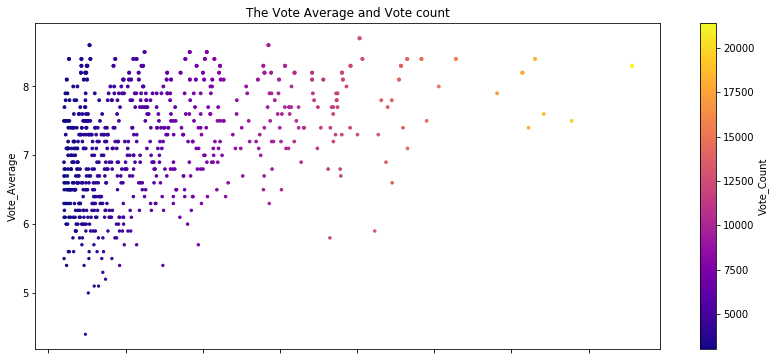

In [258]:
ax = People_Vote_df.plot.scatter(x='Vote_Count', y ='Vote_Average', 
                  c = 'Vote_Count',
                  s = People_Vote_df['Vote_Average'],figsize=(14,6),
                 colormap = 'plasma');

ax.set_title('The Vote Average and Vote count')

Text(0.5, 1.0, 'Year_Release VS Vote_Count')

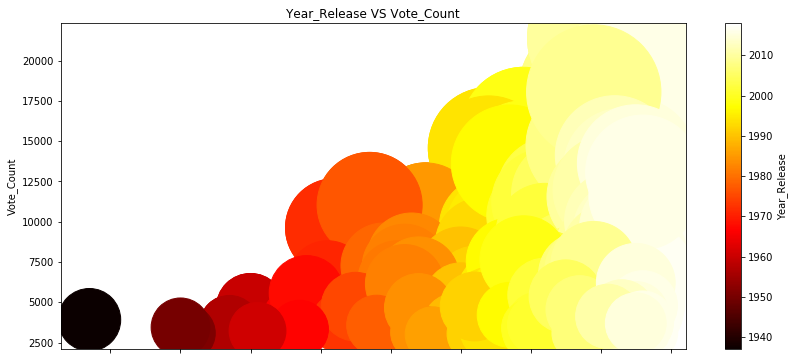

In [244]:
# we Created the years_release in correlation with Vote count of the movies
ax = People_Vote_df.plot.scatter(x='Year_Release', y ='Vote_Count', 
                  c = 'Year_Release',
                  s = People_Vote_df['Vote_Count'],figsize=(14,6),
                 colormap = 'hot');

ax.set_title('Year_Release VS Vote_Count')
#ax.set_aspect('equal')



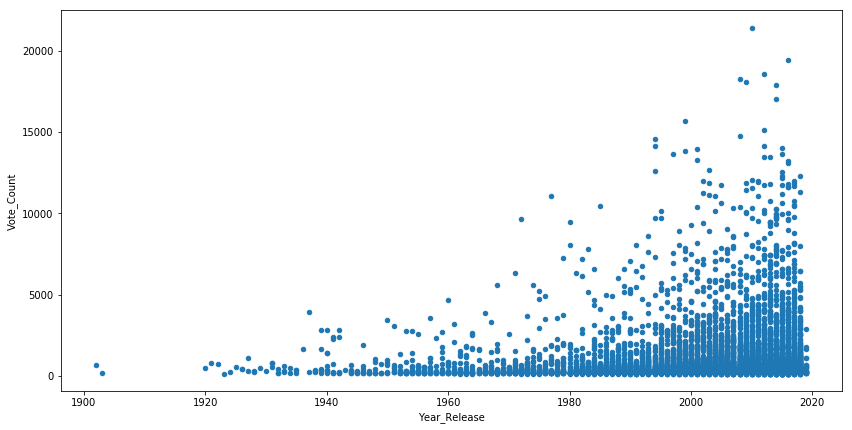

In [120]:
movies_db_df.plot(x='Year_Release',y='Vote_Count',kind='scatter',figsize=(14,7));

Text(0.5, 1.0, 'Year_Release VS Vote_Average')

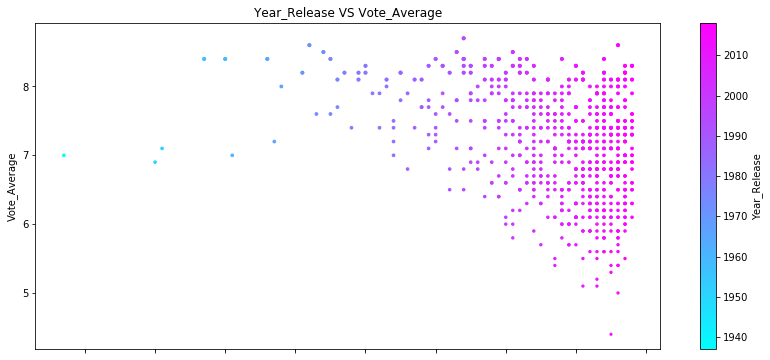

In [242]:
ax = People_Vote_df.plot.scatter(x='Year_Release', y ='Vote_Average', 
                  c = 'Year_Release',
                  s = People_Vote_df['Vote_Average'],figsize=(14,6),
                 colormap = 'cool');

ax.set_title('Year_Release VS Vote_Average')

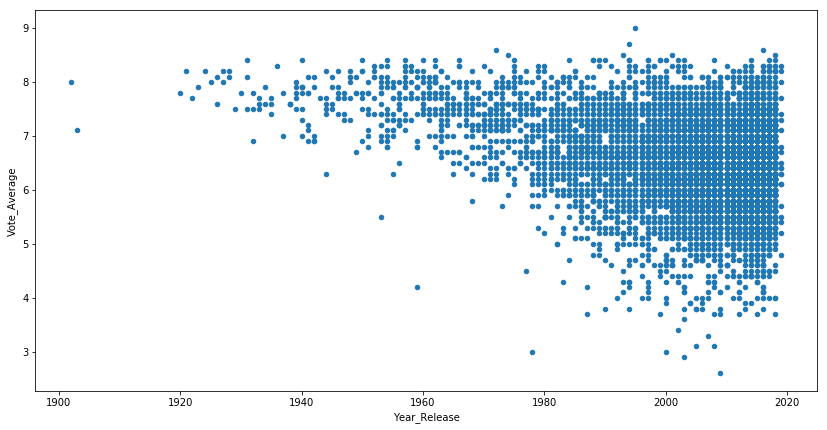

In [131]:
movies_db_df.plot(x='Year_Release',y='Vote_Average',kind='scatter',figsize=(14,7));

In [133]:
# we used the correlation table to see what the realtionship between each column.
movies_db_df.corr(method ='kendall')

,ID,Popularity,Vote_Average,Vote_Count,Year_Release
ID,1.000000,-0.082464,-0.134909,-0.092970,0.663784
Popularity,-0.082464,1.000000,0.097080,0.497291,0.023742
Vote_Average,-0.134909,0.097080,1.000000,0.143585,-0.166213
Vote_Count,-0.092970,0.497291,0.143585,1.000000,0.068716
Year_Release,0.663784,0.023742,-0.166213,0.068716,1.000000


In [135]:
People_Vote_df.corr(method ='kendall')

,ID,Popularity,Vote_Average,Vote_Count,Year_Release
ID,1.000000,0.058459,-0.163718,-0.019635,0.781719
Popularity,0.058459,1.000000,0.140409,0.379045,0.103580
Vote_Average,-0.163718,0.140409,1.000000,0.253936,-0.202373
Vote_Count,-0.019635,0.379045,0.253936,1.000000,0.034523
Year_Release,0.781719,0.103580,-0.202373,0.034523,1.000000
